In [3]:
!pip install tensorflow-hub

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Rolling back uninstall of protobuf
  Moving to c:\users\pc\anaconda3\lib\site-packages\protobuf-3.19.1-py3.9.egg-info
   from C:\Users\pc\anaconda3\Lib\site-packages\~-otobuf-3.19.1-py3.9.egg-info


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\pc\\anaconda3\\Lib\\site-packages\\google\\protobuf\\compiler\\__init__.py'



  Using cached tensorflow_hub-0.13.0-py2.py3-none-any.whl (100 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.4 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.4 which is incompatible.


  Using cached protobuf-4.22.4-cp39-cp39-win_amd64.whl (420 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1


In [64]:
!pip install tensorflow_text

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\pc\\anaconda3\\Lib\\site-packages\\tensorflow_text\\core\\pybinds\\pywrap_fast_wordpiece_tokenizer_model_builder.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow_text-2.10.0-cp39-cp39-win_amd64.whl (5.0 MB)


  Using cached tensorflow_text-2.10.0-cp39-cp39-win_amd64.whl (5.0 MB)


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow_text as text
import tensorflow_hub as hub

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## Import data

In [4]:
df = pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## EDA

ham     4825
spam     747
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

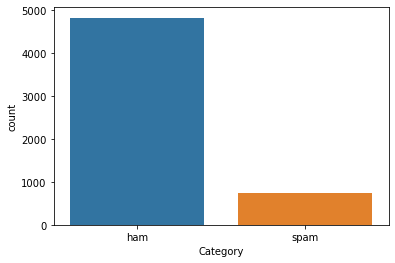

In [5]:
print(df['Category'].value_counts())
sn.countplot(df['Category'])

<AxesSubplot:xlabel='Category', ylabel='count'>

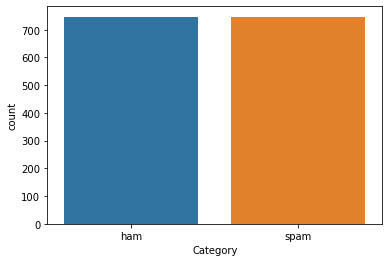

In [6]:
spam = df[df['Category']=='spam']
ham = df[df['Category']=='ham']
ham_balanced = ham.sample(spam.shape[0])
df2 = pd.concat([ham_balanced,spam])
df2
sn.countplot(df2['Category'])

In [7]:
list(df2['Message'])[3]

'HCL chennai requires FRESHERS for voice process.Excellent english needed.Salary upto  &lt;#&gt; .Call Ms.Suman  &lt;#&gt;  for Telephonic interview -via Indyarocks.com'

#### Encoding

In [8]:
df2['label'] = df2['Category'].apply(lambda x: 1 if x=='spam' else 0)
df2.sample(5)

,Category,Message,label
1500,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1
1215,ham,I'll text now! All creepy like so he won't thi...,0
2124,spam,#ERROR!,1
3874,ham,"Happy or sad , one thing about past is- ""Its n...",0
1925,ham,Ok,0


## Train test split

In [9]:
x = df2['Message']
y = df2['label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [10]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1195,), (299,), (1195,), (299,))

## Import BERT Model
import BERT model and get embeding vectors for few sample statements
BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture

In [11]:
bert_preprocess = hub.KerasLayer(rf"https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") # text preprocessing for BERT
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

#### test BERT

In [12]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding(["500$ discount. hurry up" , "Marco, are you up for a footbal game tomorrow?"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.5132726 , -0.8884572 , ..., -0.74748856,
        -0.75314724,  0.91964495],
       [-0.909161  , -0.46757415, -0.93823284, ..., -0.87980664,
        -0.69241166,  0.90691316]], dtype=float32)>

In [13]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)
print(cosine_similarity([e[0]],[e[1]]))
print(cosine_similarity([e[0]],[e[3]]))

[[0.9911089]]
[[0.84703845]]


In [14]:
df2['Message'].sample(5)

1547                Shant disturb u anymore... Jia you...
1518    Our brand new mobile music service is now live...
333     Call Germany for only 1 pence per minute! Call...
1060    EASTENDERS TV Quiz. What FLOWER does DOT compa...
531     PRIVATE! Your 2003 Account Statement for 07815...
Name: Message, dtype: object

In [15]:
get_sentence_embeding(df2['Message'].sample(5))

<tf.Tensor: shape=(5, 768), dtype=float32, numpy=
array([[-0.74029475, -0.41212997, -0.914523  , ..., -0.84621143,
        -0.6549898 ,  0.711944  ],
       [-0.79790026, -0.4275898 , -0.9497645 , ..., -0.7492212 ,
        -0.64746296,  0.8501141 ],
       [-0.5718129 , -0.4638394 , -0.8166843 , ..., -0.7084183 ,
        -0.6718993 ,  0.6524419 ],
       [-0.83487904, -0.39859596, -0.7637527 , ..., -0.6976508 ,
        -0.60061437,  0.9359079 ],
       [-0.63185394, -0.36238787, -0.7479564 , ..., -0.5327297 ,
        -0.62111616,  0.7428467 ]], dtype=float32)>

## Build Model
There are two types of models you can build in tensorflow. (1) Sequential (2) Functional
 - Overall, if your model is relatively simple and has a linear flow of data, you can use the Sequential model. But if your model is complex with multiple inputs and outputs, branching and merging, then you should use the Functional model.
 
 - BERT will convert an whole email into embedded vector, generate embedded vector for the entire sentence and feed it into NN then do the training.

In [16]:
# BERT layer
text_input = tf.keras.layers.Input(shape=() , dtype=tf.string , name='text') # `Input()` is used to instantiate a Keras tensor.
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# NN layers
l = tf.keras.layers.Dropout(0.1 , name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1 , activation='sigmoid' , name='output')(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input] , outputs=[l]) # groups layers into an object with training and inference features.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

### Train the model

In [32]:
x_train

1225    You are a winner U have been specially selecte...
4927     Oh yes, why is it like torture watching england?
1308    Get 3 Lions England tone, reply lionm 4 mono o...
4236    FREEMSG: Our records indicate you may be entit...
1366    HOT LIVE FANTASIES call now 08707509020 Just 2...
                              ...                        
5141    FREE for 1st week! No1 Nokia tone 4 ur mobile ...
850     Today's Offer! Claim ur £150 worth of discount...
2879    Hey Boys. Want hot XXX pics sent direct 2 ur p...
4387    , im .. On the snowboarding trip. I was wonder...
2794        Not from this campus. Are you in the library?
Name: Message, Length: 1195, dtype: object

In [17]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [21]:
model.fit(x_train, y_train, epochs=1)

38/38 [==============================] - 667s 18s/step - loss: 0.6375 - accuracy: 0.6351 - precision: 0.6405 - recall: 0.6147


In [23]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 160s 16s/step - loss: 0.5607 - accuracy: 0.8462 - precision: 0.9127 - recall: 0.7667


[0.5607418417930603,
 0.8461538553237915,
 0.9126983880996704,
 0.7666666507720947]

In [24]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()
y_predicted[:2]

10/10 [==============================] - 186s 18s/step


array([0.6071192, 0.4989962], dtype=float32)

In [25]:
y_predicted = np.where(y_predicted > 0.5, 1, 0) # where(condition, [x, y])
y_predicted

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [26]:
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[138,  11],
       [ 35, 115]], dtype=int64)

Text(33.0, 0.5, 'Truth')

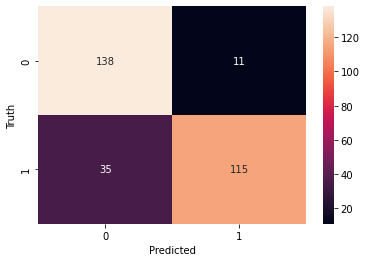

In [35]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       149
           1       0.91      0.77      0.83       150

    accuracy                           0.85       299
   macro avg       0.86      0.85      0.85       299
weighted avg       0.86      0.85      0.85       299



## Prediction

In [29]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 4s 4s/step


array([[0.51864284],
       [0.5713695 ],
       [0.54322183],
       [0.37218133],
       [0.3568619 ]], dtype=float32)